# Physics-Based Scene Simulation: Visualization

This notebook visualizes the balance dynamics of a two-legged standing body using an inverted pendulum model. 
It imports simulation data from `reactive_stepping_body.py` and generates an animated visualization.

In [1]:
%matplotlib notebook

<IPython.core.display.Javascript object>


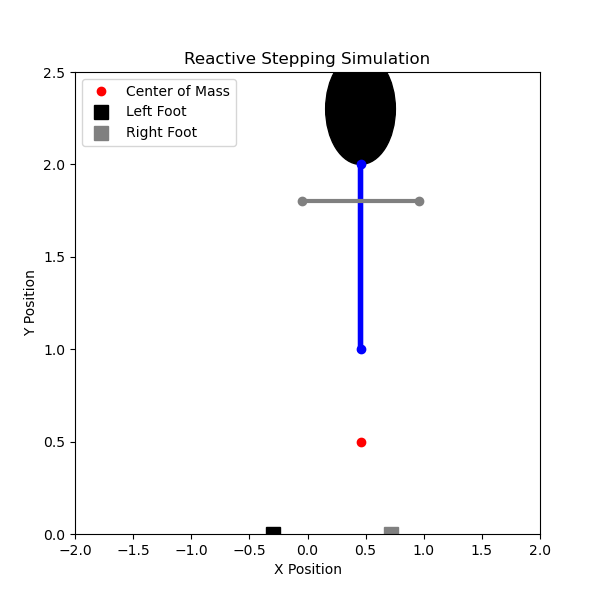

In [2]:
# Reactive Stepping Body Visualization

import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import sys

# Add the path to your physics module (adjust if needed)
sys.path.append("C:/Users/Admin/Documents/Michigan MSU/Spring 2025/CMSE 802/Project/cmse802_project/src/physics")

from reactive_stepping_body import simulate_reactive_stepping_body

# Run the simulation
time, torso_x, torso_y, foot_positions, com_positions, step_events = simulate_reactive_stepping_body()

# Set up the plot
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlim(-2, 2)
ax.set_ylim(0, 2.5)
ax.set_xlabel("X Position")
ax.set_ylabel("Y Position")
ax.set_title("Reactive Stepping Simulation")

# Plot elements
torso_line, = ax.plot([], [], 'o-', lw=4, color='blue')
com_marker, = ax.plot([], [], 'ro', markersize=6, label='Center of Mass')
left_foot_marker, = ax.plot([], [], 's', color='black', markersize=10, label='Left Foot')
right_foot_marker, = ax.plot([], [], 's', color='gray', markersize=10, label='Right Foot')
step_text = ax.text(-1.5, 2.2, '', fontsize=10, color='darkred')

# Additional elements for head and arms
arm_line, = ax.plot([], [], 'o-', lw=3, color='gray')
head_radius = 0.3
head_circle = plt.Circle((0, 0), 0.3, color='black')
ax.add_patch(head_circle)

ax.legend()

def init():
    torso_line.set_data([], [])
    com_marker.set_data([], [])
    left_foot_marker.set_data([], [])
    right_foot_marker.set_data([], [])
    arm_line.set_data([], [])
    head_circle.center = (0, 0)
    step_text.set_text('')
    return torso_line, com_marker, left_foot_marker, right_foot_marker, arm_line, head_circle, step_text


def update(frame):
    # Foot positions
    lf_x, rf_x = foot_positions[frame]
    foot_y = 0

    # Center of mass (COM)
    com_x = com_positions[frame]
    com_y = 0.5

    # Torso position
    tx = torso_x[frame]
    ty = torso_y[frame]

    # Update visuals
    torso_line.set_data([com_x, tx], [foot_y + 1, ty])
    com_marker.set_data(com_x, com_y)
    left_foot_marker.set_data(lf_x, foot_y)
    right_foot_marker.set_data(rf_x, foot_y)
    
    # Compute shoulder position (a bit below torso top)
    x_shoulder = tx
    y_shoulder = ty - 0.2

    # Arms stretch horizontally from shoulder
    arm_span = 1.0  
    arm_x = [x_shoulder - arm_span / 2, x_shoulder + arm_span / 2]
    arm_y = [y_shoulder, y_shoulder]

    # Head (above shoulder)
    head_radius = 0.3
    x_head = x_shoulder
    y_head = y_shoulder + head_radius + 0.2
    head_circle.center = (x_head, y_head)


    arm_line.set_data(arm_x, arm_y)

    # Step event text
    if frame in step_events:
        step_text.set_text(f"Step triggered at t = {time[frame]:.2f}s")
    else:
        step_text.set_text("")

    return torso_line, com_marker, left_foot_marker, right_foot_marker, arm_line, head_circle, step_text


ani = animation.FuncAnimation(
    fig, update, frames=len(time), init_func=init,
    blit=True, interval=20
)

plt.show()
